# LAB2: Algorytmy grafowe – reprezentacja, algorytmy przeszukiwania


## Zadanie 1
Reprezentacja w postaci maceirzy sąsiedztwa zapewnia dodawanie, sprawdzanie i usuwanie krawędzi w stałym czasie, natomiast posiada dużę wymagania pamięciowe - macierz, więc O(n<sup>2</sup>)

Lista sąsiedztwa posiada stały czas dodawania nowej krawędzi oraz znacznie miejsze wymagania pamięciowe, gdyż będzie to suma liczby wierzchołków i krawędzi (w najgorszym wypadku), natomiast znacznie dłuższy czas usuwania i sprawdzania istnienia wierzchołków

## Zadanie 2
W zadaniach przyjmę reprezentację grafu jako listę sąsiedztwa, gdyż wydaje się być prostsza w implementacji w Pythonie i zdecdyownie wygodniejsza do używania.

In [55]:
from typing import List, Dict, Tuple
graph = Dict[int, List]

#implementacja wybranego grafu (nieskierowany, cykliczny, spójny) za pomocą słownika, którego kluczami są wierzchołki, a wartościami lista połączonych wierzchołków
G: graph = { 1: [2,4], 2: [1, 3], 3: [2, 7], 4: [1, 5, 7], 5: [4, 6], 6: [5], 7: [3, 4, 8], 8: [7, 9], 9: [8, 10], 10: [9] }

def BFS(G: graph, s: int) -> Tuple[List[int], bool, bool]:
    """
    Algorytm przeszukiwania wszerz, przyjmuje graf G oraz wierzchołek, z którego rozpoczynamy przeszukiwanie,
    zwraca krotkę, zawierającą wierzchołki w kolejności odwiedzenia, wartość bool czy graf jest acykliczny oraz czy jest spójny
    """
    
    acyclic = True      #flagi do sprawdzania acykliczności i spójności
    consistent = True
    
    No = []     #inicjaizacja listy na odwiedzone wierzchołki
    FIFO = []   #inicjaizacja kolejki do przeszukiwania
    FIFO.append(s)  #dodanie wierzchołka początkowego
    while FIFO:     #pętla główna trwająca do momentu opróżnienia kolejki
        v = FIFO.pop(0) #zdjęcie z kolejki pierwszego elementu
        if v not in No: 
            No.append(v)    #jeśli wierzchołka nie ma w odwiedzonych to dodajemy go do tej listy
            prev_vistied = 0    #zmienna monitorująca ilość wcześniej odwiedzonych wierzchołków potrzebna do sprawdzenia acyklicnzości
            if v not in G.keys(): #sprawdzenie czy weirzchołek znajduje się na liście sąsiedztwa
                continue
            for u in G[v]:  #przejście przez kolejne wierzchołki sąsiadujące z wierzchołkiem obecnie przetwarzanym 
                if u in No: #jeśli wierzchołek znajduje się w odwiedzonych to zwiększamy zmieną prev_visited
                    prev_vistied += 1   
                    if prev_vistied > 1:   #jeśli zmienna ta będzie większa niż 1, to znaczy, że mamy cykl 
                        acyclic = False    #(więcej niż jeden wierzchołek się powtarza, bo nie liczymy tego, z którego przyszliśmy)
                else:
                    FIFO.append(u)          #jesli wierzchołka nie było na liście to dodajemy
                             
    if len(G.keys()) > len(No):             #sprawdzenie spójności, wtedy gdy liczba przetworzonych wierzchołków jest mneijsza niż wszytskich w grafie
        consistent = False

    return No, acyclic, consistent          #zwrot wcześniej opisanych wartości



def print_results(result: Tuple[List[int], bool, bool]) -> None:
    res = ""
    for idx, vertex in enumerate(result[0], 1):
        res += f'{idx}: {vertex}, '
    print(res)
    print(f'Graf {"" if result[1] else "nie "}jest acykliczny')
    print(f'Graf {"" if result[2] else "nie "}jest spójny')


print_results(BFS(G, 1))

1: 1, 2: 2, 3: 4, 4: 3, 5: 5, 6: 7, 7: 6, 8: 8, 9: 9, 10: 10, 
Graf nie jest acykliczny
Graf jest spójny


## Zadanie 3
Sprawdzenie 3 przypadków grafów:

### Graf spójny acykliczny

In [56]:
graph = {
    1: [2, 3],
    2: [1, 5],
    3: [1, 4, 6],
    4: [3],
    5: [2, 7],
    6: [3],
    7: [5]
}
print_results(BFS(graph, 1))

1: 1, 2: 2, 3: 3, 4: 5, 5: 4, 6: 6, 7: 7, 
Graf jest acykliczny
Graf jest spójny


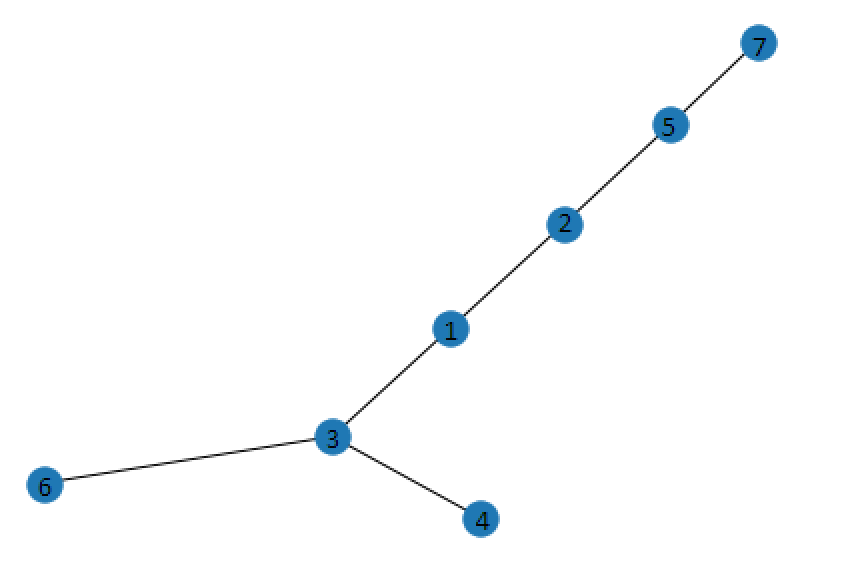

### Graf niespójny cykliczny

In [57]:
graph = {
    1: [2, 3, 4],
    2: [1, 5],
    3: [1, 5],
    4: [1],
    5: [2, 3, 6],
    6: [5],
    7: [8],
    8: [7]
}
#algorytm da różne wyniki w zależności od startwego wierzchołka
print_results(BFS(graph, 1))

1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 
Graf nie jest acykliczny
Graf nie jest spójny


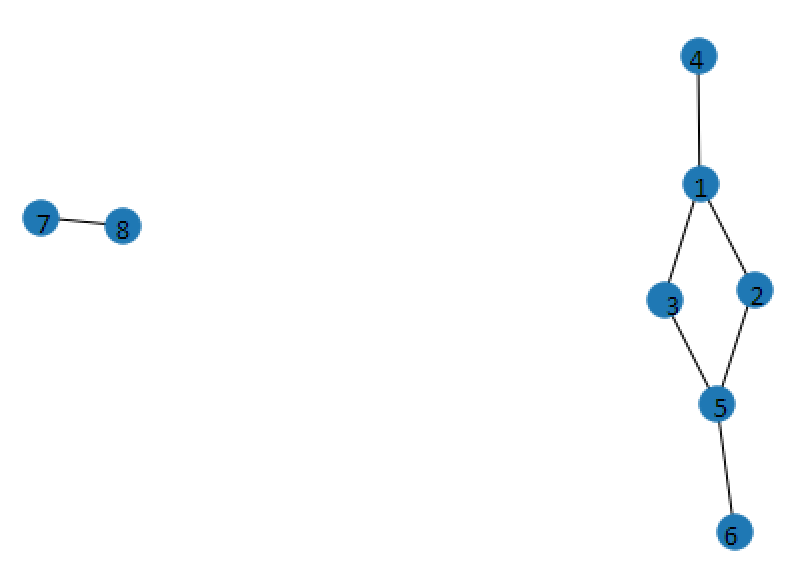

### Graf spójny cykliczny

In [58]:
graph = {
    1: [2, 3, 4],
    2: [1, 5],
    3: [1, 5],
    4: [1],
    5: [2, 3, 6],
    6: [5, 7],
    7: [6]
}
print_results(BFS(graph, 1))

1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 
Graf nie jest acykliczny
Graf jest spójny


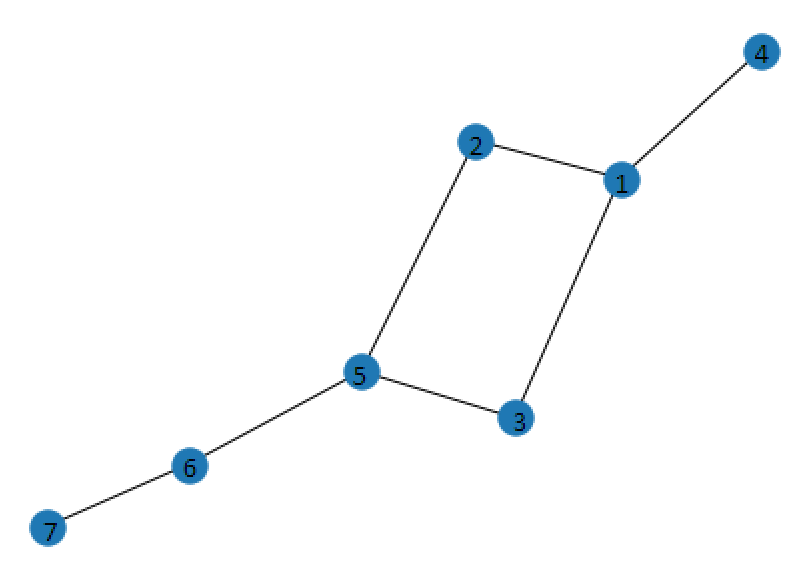

### Zadanie 4

* W przypadku szukania wierzchołka rozpinającego, czyli takiego, którego usunięcie spowodowaloby, że graf nie będzie spójny. Można zastosować przeszukiwanie BFS lub DFS w celu sprawdzenia czy graf przestanie być spójny w momencie usunięcia wierzchołka. Wierzchołków takich może być kilka, a sprawa staje się bardziej skomplikowana gdy graf jest niespójny, bo wtedy niezależnie który wierzchołek usuniemy graf i tak będzie niespójny
* W przypadku szukania centrum grafu, czyli wierzchołka, którego maskymalna odległość od wierzchołka jest najmniejsza, należałoby użyc algorytmu przeszukiwania BFS lub DFS dla każdego z wierzchołków, który oblicząlby maksymalne odległości od pozostałych wierzchołków, a następnie wybrany zostałby wierzchołek dla którego maksymalna odległość jest minimalna.
* Można wyznaczyć np. zbiór sąsiadów danego wierzchołka v leżąnych w danej odległości np. mniejszej niż "d". Wtedy przy odkładaniu wierzchołków do kolejki lub na stos należałoby dodawać zmienną monitorującą odległość od wierzchołka startowego v, np w postaci krotki: (v, d_from_v)
* Sprawdzanie ścieżki pomiędzy 2 wierzchołkami, algorytm BFS zwracałby ścieżkę w momencie natrafienia na poszukiwany wierzchołek, a przechowywał poprzednio odwiedzone wierzchołki w dodatkowej liście.